<h1>Buisness Intelligence - Sheet 4 </h1>
<h3> Camilo Andrés Vega Agudelo - 0000163913</h3>
<h3> Juan Felipe Herrera Rincon - 0000156342</h3>
<h3> Johan Nicolas Imbachi Nino - 0000179756 </h3>

In [70]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

credit = pd.read_csv('./credits.csv')
airline = pd.read_csv('./airlinetickets.csv')

In [5]:
def getNumericalAttributes(df):
    return list(df.select_dtypes(exclude=[object]))

<h2>Exercise 2</h2>

 <b>1</b>. Can categorical attributes have outliers? Explain!

No, when the categorical attributes get binarized, one variable becomes multiple variable, leading to ambiguous results of the data because one point may be considered outlier, when it isn't a outlier.

 <b>2</b>. Write a function createBoxplots(D) that creates, for a data frame D, d figures, where d is the number of numerical attributes. Each figure corresponds to a numerical attribute and should show the 5 boxplots corresponding to whiskers with for IQR multipliers in [0.25, 0.5, 1, 1.5, 2].

In [551]:
def getNumericalAttributes(df):
    return list(df.select_dtypes(exclude=[object]))

def createBoxPlots(D):
    iqrMultipliers = [0.25, 0.5, 1, 1.5, 2]
    numericalAtts = getNumericalAttributes(D)
    d = len(numericalAtts)
    
    for i in numericalAtts:
        fig, ax = plt.subplots(1,5, figsize=(20,5))
        for j, whis in enumerate(iqrMultipliers):
            col = D[i]        
            ax[j].set_title(i)
            ax[j].yaxis.set_ticks_position('none')
            ax[j].grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
            ax[j].set_xlabel('whisker at ' + str(whis))
            ax[j].boxplot(col, whis=whis)  
            fig.tight_layout()

 <b>3</b>. Show the results for the credit and airline ticket dataset. Are there outliers? If yes, what do you suggest to do with them?

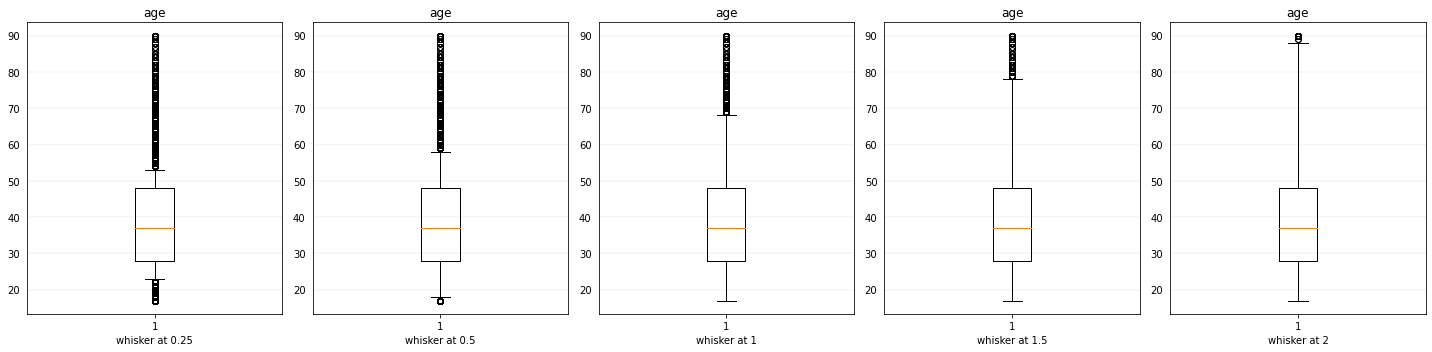

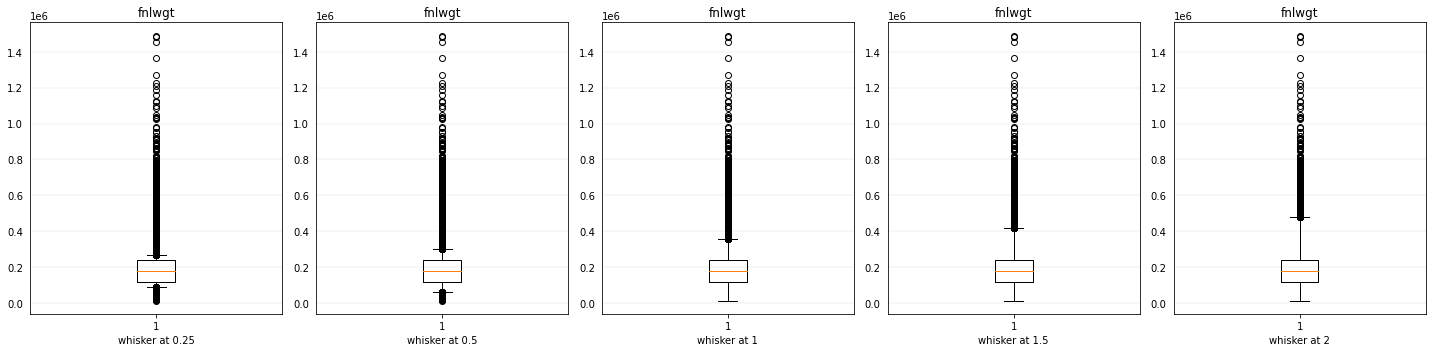

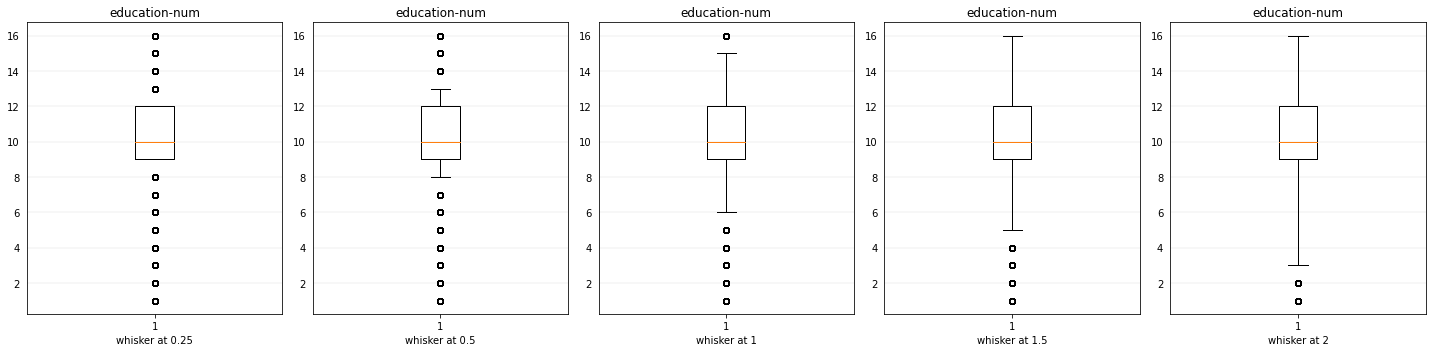

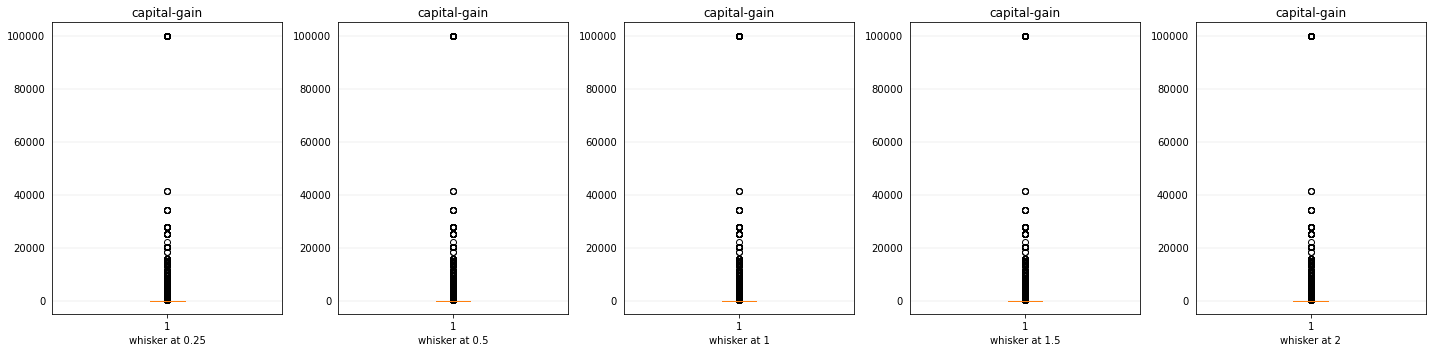

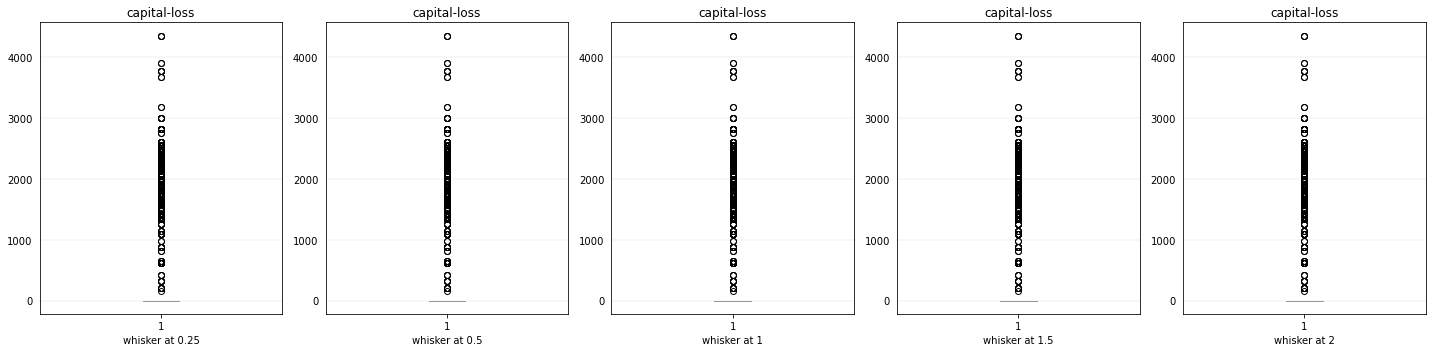

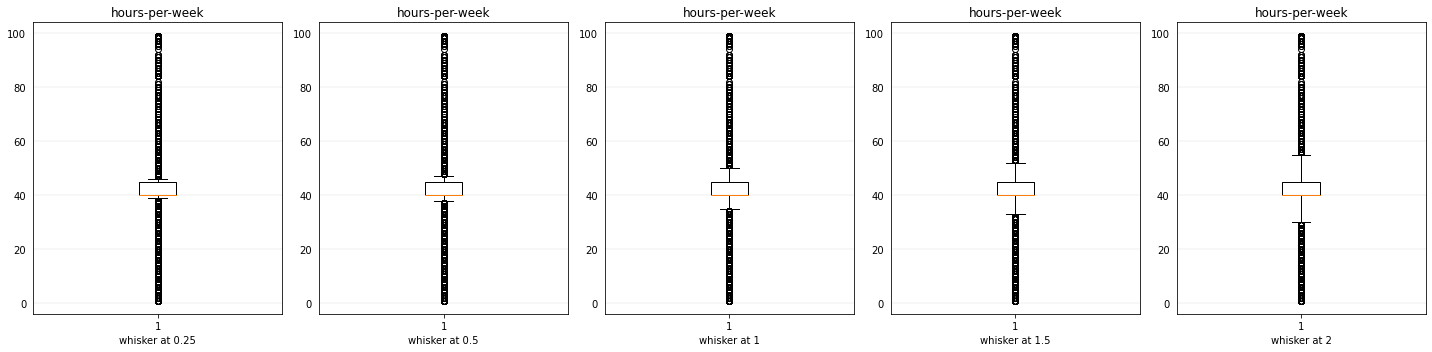

In [552]:
createBoxPlots(credit)

There are outliers, in order to fix it, outliers must be removed, the IQR must be recalculated cause removing outliers generate changes, then search for new outliers and keep doing until there is no more outliers.

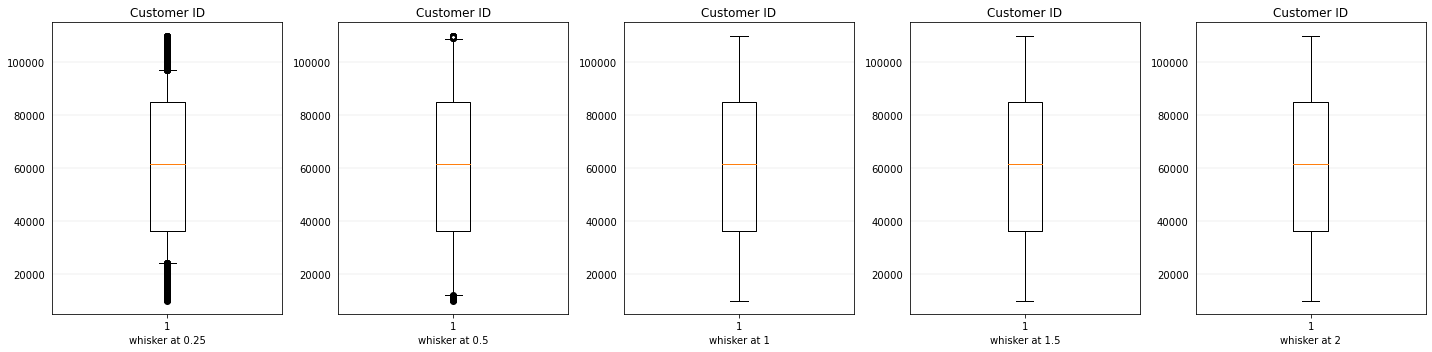

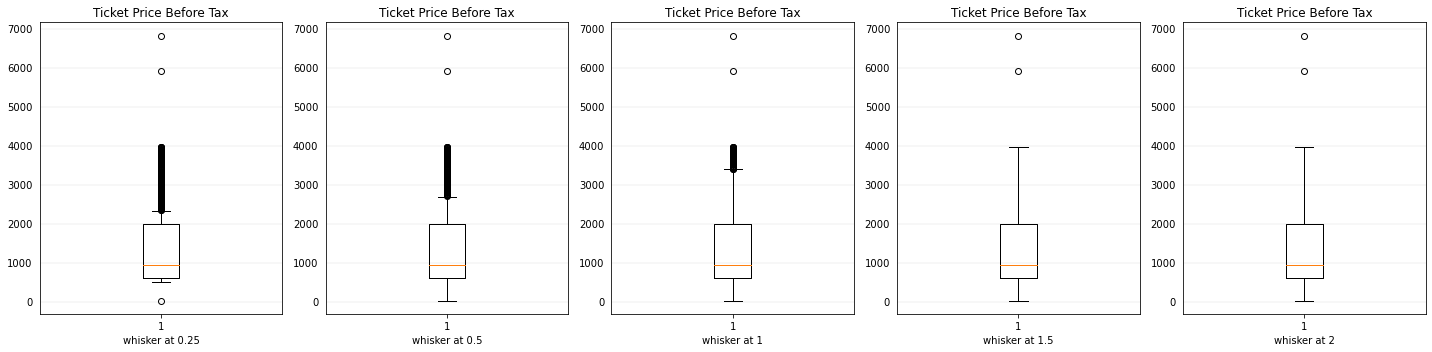

In [553]:
createBoxPlots(airline)

 <b>4</b>. Write a function removeOutliers(D, k) that removes from a data frame D any instance that has, in any numerical attribute a deviation of at least k · IQR from q3 (above) or k · IQR from q1 (below). Keep in mind that this removal implies that the sample statistics and hence IQR changes, so you might have to re-run the routine until you get a stable result. Hint: Use recursion to solve this task.

In [69]:
def removeOutliers(D, k):
    
    row_length = D.shape[0]
    if row_length == 0:
        return D
    
    numericalAtts = getNumericalAttributes(D)

    trues = np.array([True] * row_length)
    for i in numericalAtts:
        col = D[i]  
        iqr = np.subtract(*np.percentile(col, [75, 25]))
        q3 = np.percentile(col, [75])
        q1 = np.percentile(col, [25])
        above = np.array(col)<=(q3[0] + k*iqr)
        below = np.array(col)>=(q1[0] - k*iqr)
        trues = trues & above & below

    conditioned = pd.DataFrame(D[trues])
    final_frame = conditioned.reset_index(drop = True)
    final_row_length = final_frame.shape[0]
    
    if final_row_length!= row_length:
        return removeOutliers(final_frame, k)
    else:
        return final_frame
    return final_frame

In [68]:
# funcion dentro de la funcion si se ha removido algo if deleted, removeOutliers
# comapre columns, if all records are true, keep it
# get all true records pandas
# condicionar mis columndas
# retorna un df con la condicion

# df = pd.DataFrame([[1,2],[3,4],[5,6],[7,8],[9,10]])
# arr = np.array([True]*5)
# print('array')
# print(arr)
# print('\n')
# col1 = np.array([1, 2, 3, 4, 5])
# condition1 = col1>=3
# print('1 condition')
# print(condition1)
# print('\n')
# mid_condition = arr & condition1
# print('mid condition')
# print(mid_condition)
# print('\n')
# col2 = np.array([6, 7, 8, 9, 0])
# condition2 = col2<=8
# print('2 condition')
# print(condition2)
# print('\n')
# final_condition = mid_condition & condition2
# print('final condition')
# print(final_condition)
# print(df[final_condition])